# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,102,94,42,68,150,64,7,128,52,18,143,154,246,159,69,14,5,192,196
1,566,108,54,103,212,65,11,208,32,24,162,228,648,240,71,9,0,189,197
2,655,86,35,44,110,54,2,119,57,17,121,139,208,137,90,6,1,180,183
3,611,90,49,85,141,57,11,159,43,20,167,173,365,186,75,1,11,182,192
4,833,92,46,83,154,56,6,160,41,20,148,185,382,184,71,10,5,186,191
5,114,93,43,85,133,54,10,155,44,19,153,174,351,165,75,12,13,184,196
6,240,89,36,77,172,62,8,157,42,19,125,174,367,126,63,5,22,198,205
7,627,88,44,71,165,70,7,144,46,19,141,167,312,172,71,4,4,188,193
8,306,106,48,107,202,61,10,207,32,24,153,227,635,200,70,5,28,190,203
9,362,95,47,81,176,59,7,168,39,20,152,196,425,185,67,4,4,191,198


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,421.486339,93.489982,44.644809,81.604736,168.151184,61.615665,8.378871,167.918033,41.202186,20.517304,147.475410,187.715847,435.821494,173.442623,72.406193,6.591985,12.854281,189.009107,195.617486
std,245.361818,8.175448,6.237943,15.882393,33.236063,7.224995,4.061838,33.927072,7.975619,2.652325,14.733578,31.989553,180.166653,32.617878,7.340322,4.993902,8.961428,6.195854,7.437535
min,0.000000,77.000000,33.000000,40.000000,104.000000,48.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,213.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,144.000000,33.000000,19.000000,136.000000,166.000000,312.000000,148.000000,67.000000,2.000000,6.000000,184.000000,190.000000
50%,424.000000,92.000000,44.000000,78.000000,165.000000,61.000000,8.000000,156.000000,43.000000,19.000000,145.000000,178.000000,361.000000,173.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,630.000000,99.000000,49.000000,96.000000,195.000000,65.000000,10.000000,197.000000,46.000000,23.000000,158.000000,216.000000,583.000000,198.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,333.000000,138.000000,52.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
### YOUR CODE HERE
## нормируем
sc = StandardScaler().fit(X_train, y_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.303290,0.062441,-0.424374,-0.857374,-0.546627,0.330313,-0.339779,-1.177657,1.355087,-0.949959,-0.304033,-1.054926,-1.054549,-0.443186,-0.464462,1.484765,-0.877253,0.483165,0.051477
1,0.589519,1.776447,1.501092,1.348334,1.320518,0.468848,0.645895,1.182493,-1.154842,1.314270,0.986715,1.260439,1.178753,2.042379,-0.191746,0.482631,-1.435709,-0.001471,0.186053
2,0.952579,-0.916991,-1.547562,-2.369859,-1.751237,-1.055033,-1.571872,-1.443173,1.982570,-1.327331,-1.798582,-1.524256,-1.265657,-1.118278,2.399057,-0.118650,-1.324018,-1.455380,-1.698008
3,0.773089,-0.427275,0.698814,0.213970,-0.817664,-0.639429,0.645895,-0.263099,0.225619,-0.195216,1.326385,-0.460440,-0.393447,0.385336,0.353686,-1.120784,-0.207107,-1.132289,-0.486826
4,1.678700,-0.182417,0.217448,0.087930,-0.426166,-0.777964,-0.586198,-0.233597,-0.025374,-0.195216,0.035638,-0.084975,-0.299004,0.323964,-0.191746,0.683058,-0.877253,-0.486108,-0.621402


In [8]:
## кодируем
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [9]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

In [10]:
### YOUR CODE HERE
# выбор оптимальных гиперпараметров

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg_cv_f1 = GridSearchCV( LogisticRegression(
        multi_class='multinomial',
        solver='saga',
        max_iter=500,
        tol=1e-3
    ),
    cv=5,
    param_grid={
        'penalty': ['l1', 'l2', 'none'],
        'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
        'fit_intercept': [True, False],
        'random_state': [42]
    },
    n_jobs=-1,
    scoring='f1_macro',
    verbose=1
).fit(X_train, y_train)

model = logreg_cv_f1.best_estimator_
print('best score is', logreg_cv_f1.best_score_)
print('best params are', logreg_cv_f1.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
best score is 0.7884274441483908
best params are {'C': 10, 'fit_intercept': True, 'penalty': 'l1', 'random_state': 42}


In [11]:
# оценка производительности модели

from sklearn.metrics import accuracy_score, f1_score

print('Train')
print('f1 :', f1_score(y_train, model.predict(X_train), average='weighted'))
print('accuracy score :', accuracy_score(y_train, model.predict(X_train)))

print('Test')
print('f1 :', f1_score(y_test, model.predict(X_test), average='weighted'))
print('accuracy score :', accuracy_score(y_test, model.predict(X_test)))

Train
f1 : 0.8390472195120078
accuracy score : 0.8397085610200364
Test
f1 : 0.7760652597530087
accuracy score : 0.7744107744107744


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

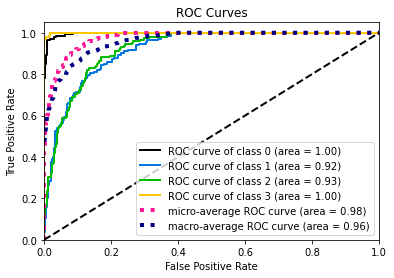

In [12]:
# построение ROC-кривой
from scikitplot.metrics import plot_roc

plot_roc(y_train, model.predict_proba(X_train))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [13]:
### YOUR CODE HERE

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(X_train)

19 главных компонент
дисперсия практически не меняется после 9 главных компонентов
отношение дисперсии для 9 главных компонентов составляет 0.9849


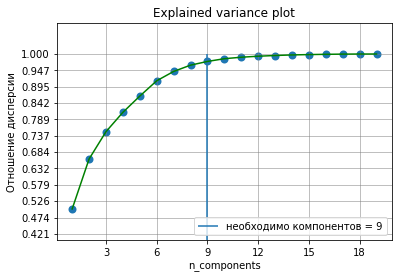

In [14]:
variance_ratios = pca.explained_variance_ratio_.cumsum()
originality_threshold = 0.01  
n_components_required = 1

while n_components_required < pca.n_components_ and (variance_ratios[n_components_required] - variance_ratios[n_components_required - 1]) / variance_ratios[n_components_required - 1] > originality_threshold:
    n_components_required += 1

print(pca.n_components_, 'главных компонент')
print("дисперсия практически не меняется после", n_components_required, 'главных компонентов')
print('отношение дисперсии для', n_components_required, 'главных компонентов составляет', np.round(variance_ratios[n_components_required], decimals=4))

plt.title('Explained variance plot')
plt.xlabel('n_components')
plt.ylabel('Отношение дисперсии')

plt.xticks(ticks=range(0, pca.n_components_ + 1, 3))
plt.yticks(ticks=np.linspace(0, 1, 20))
plt.ylim(0.4, 1.1)
plt.grid(which='major', axis='both', color='grey', linestyle='-', linewidth=0.5)

plt.plot(range(1, pca.n_components_ + 1), variance_ratios, 'g');
plt.scatter(range(1, pca.n_components_ + 1), variance_ratios, linewidths=2);
plt.vlines(n_components_required, ymin=0, ymax=1, label=f'необходимо компонентов = {n_components_required}')

plt.legend(loc='lower right');

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [15]:
### YOUR CODE HERE

# Данные уже нормализованы.
# Увеличение количества компонентов не приводит к существенному увеличению дисперсии, при этом, как мне кажется, уменьшение количества будет ощутимо.

In [16]:
pca = PCA(n_components=n_components_required).fit(X_train) # --> log reg accuracy, f1 ~ 0.72
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [17]:
### YOUR CODE HERE
# выбор оптимальных гиперпараметров
log_reg_cv_f1_pca_features = GridSearchCV(
    LogisticRegression(
        multi_class='multinomial',
        solver='saga', tol=1e-3
    ),
    cv=3,
    param_grid={
        'penalty': ['l1', 'l2'],
        'C': [1e-2, 1e-1, 5e-1, 1, 2, 5, 10, 100],
        'random_state': [42],
        'fit_intercept': [True, False],
        'max_iter': [50, 100, 200, 400, 500]
    },
    n_jobs=-1,
    scoring='f1_weighted',
    verbose=1
).fit(X_train_pca, y_train)

model = log_reg_cv_f1_pca_features.best_estimator_
print('best score is :', log_reg_cv_f1_pca_features.best_score_)
print('best params are :', log_reg_cv_f1_pca_features.best_params_)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
best score is : 0.6647596964487744
best params are : {'C': 1, 'fit_intercept': True, 'max_iter': 50, 'penalty': 'l1', 'random_state': 42}


C:\Users\V.DESKTOP-LBGOBSE\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [18]:
# оценка производительности модели

print('Train')
print('f1  ', f1_score(y_train, model.predict(X_train_pca), average='weighted'))
print('accuracy score ', accuracy_score(y_train, model.predict(X_train_pca)))

print('Test')
print('f1 ', f1_score(y_test, model.predict(X_test_pca), average='weighted'))
print('accuracy score', accuracy_score(y_test, model.predict(X_test_pca)))

Train
f1   0.6674049109087603
accuracy score  0.6775956284153005
Test
f1  0.6210316009928665
accuracy score 0.6262626262626263


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

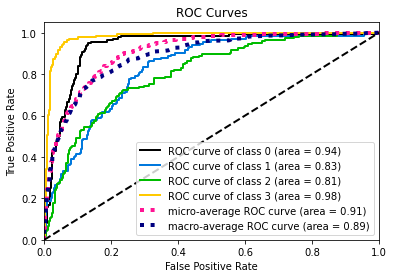

In [19]:
#построение ROC-кривой
plot_roc(y_train, model.predict_proba(X_train_pca))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [20]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

grid_cv_tree = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid={'max_depth': [2, 3, 5, 7, 8, 9, 10]},
    cv=5,
    n_jobs=-1
).fit(X_train_pca, y_train)

model = grid_cv_tree.best_estimator_
print('best score is ', grid_cv_tree.best_score_)
print('best params are', grid_cv_tree.best_params_)


best score is  0.6503085904920768
best params are {'max_depth': 10}


In [21]:
print('Train')
print('f1 ', f1_score(y_train, model.predict(X_train_pca), average='weighted'))
print('accuracy sc is', accuracy_score(y_train, model.predict(X_train_pca)))

print('Test')
print('f1 ', f1_score(y_test, model.predict(X_test_pca), average='weighted'))
print('accuracy sc is', accuracy_score(y_test, model.predict(X_test_pca)))

Train
f1  0.972738950981423
accuracy sc is 0.9726775956284153
Test
f1  0.6342073152504835
accuracy sc is 0.6296296296296297


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [29]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
rf_f1, rf_acc = [], []

for N in range(N_min, N_max, step):
    rf = RandomForestClassifier(n_estimators=N).fit(X_train_pca, y_train)
    rf_pred = rf.predict(X_test_pca)
    rf_f1.append(f1_score(y_test, rf_pred, average='weighted'))
    rf_acc.append(accuracy_score(y_test, rf_pred))

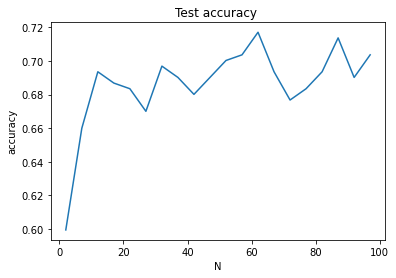

In [30]:
plt.title('Test accuracy ')
plt.xlabel('N')
plt.ylabel('accuracy')
plt.plot(range(N_min, N_max, step), rf_acc);

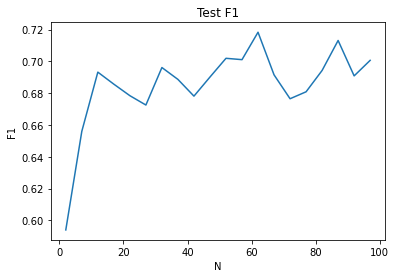

In [31]:
plt.title('Test F1')
plt.xlabel('N')
plt.ylabel('F1')
plt.plot(range(N_min, N_max, step), rf_f1);

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [36]:
# YOUR CODE HERE
# YOUR CODE HERE
def experiment(model_type):
    step = len(X_train_pca) // 10
    accuracy_scores, f1_scores = [], []

    for i in range(1, 11):
        new_x_train = X_train_pca[:i * step if i < 10 else len(X_train_pca)]
        new_y_train = y_train[:i * step if i < 10 else len(X_train_pca)]

        if model_type == 'log_reg':
            model = LogisticRegression(
                C=10, fit_intercept=True, max_iter=400, penalty='l1',
                random_state=42, solver='saga'
            )
        elif model_type == 'dec_tree':
            model = DecisionTreeClassifier(max_depth=9, random_state=42)
        elif model_type == 'rand_forest':
            model = RandomForestClassifier(n_estimators=75, random_state=42)

        model = model.fit(new_x_train, new_y_train)
        preds = model.predict(X_test_pca)

        accuracy_scores.append(accuracy_score(y_test, preds))
        f1_scores.append(f1_score(y_test, preds, average='weighted'))

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

    for i, metric_name, metric_values in zip([1, 2], ['F1', 'Accuracy'], [f1_scores, accuracy_scores]):
        plt.subplot(1, 2, i)
        plt.title(f'{metric_name} test score for {model_type} with respect to train_size')
        plt.xlabel('train_size')
        plt.ylabel(metric_name.lower())
        plt.xticks(np.linspace(0, 1, 11))
        plt.yticks(np.linspace(0, 1, 11))
        plt.ylim(0, 1)
        plt.grid(which='major', axis='both', color='grey', linestyle='-', linewidth=1)
        plt.plot(np.linspace(0.1, 1, 10), metric_values, linewidth=2)


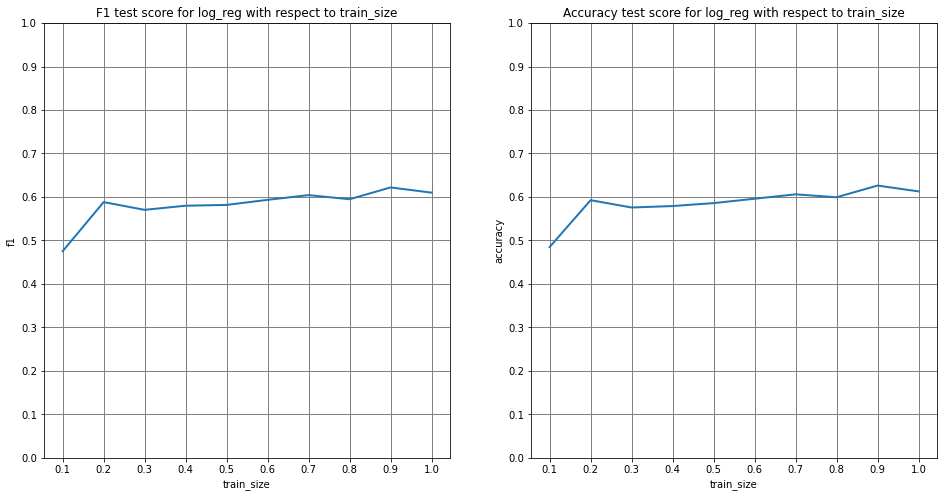

In [37]:
import warnings
warnings.filterwarnings('ignore')

experiment('log_reg')

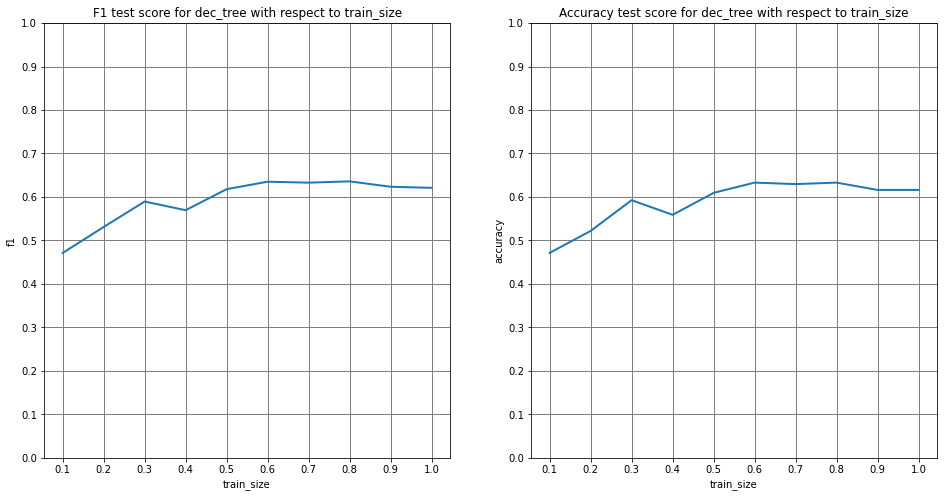

In [38]:
experiment('dec_tree')


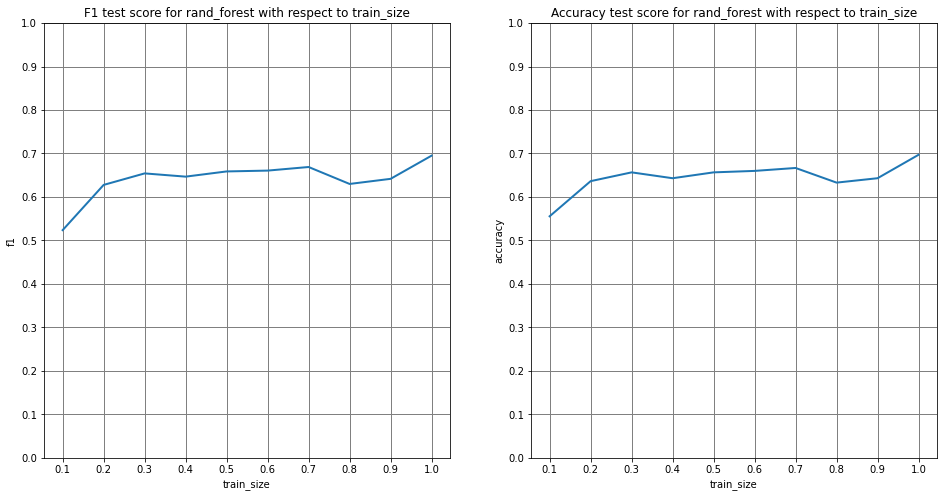

In [39]:
experiment('rand_forest')

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [ ]:
# YOUR CODE HERE